In [63]:
import scipy.io as sci
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt

### Separate based on response (flash first or beep first)

In [18]:
resppath = 'StabilityofPCommonData/NumerosityTaskUnformatted/*.mat'
respfiles = np.array(glob.glob(resppath))
datapath = 'StabilityofPCommonData/NumerosityTaskData/*.mat'
datafiles = np.array(glob.glob(datapath))

In [19]:
# filenames for f or b responses
respf = np.empty((1, 1))
respb = np.empty((1, 1))
for names in respfiles:
    mat = sci.loadmat(names)
    resp = mat['respCode']
    if(resp == "f"):
        respf = np.append(respf, names)
    else:
        respb = np.append(respb, names)
respf = respf[1:]
respb = respb[1:]

In [20]:
# index for flash first files(1 if yes 0 if no) 
# use for TaskData to pull data for subjects that reported flash first
indexf = list()
c = 0
for x in respfiles:
    if x in respf:
        indexf.append(c)
    c += 1
#respfiles[indexf]

# exclude files that are incomplete
dataf = datafiles[indexf]
missing = np.empty((1,1), dtype = int)

for i in np.arange(0, len(dataf)):
    mat = sci.loadmat(dataf[i])
    #print(len(mat['trialData']))
    if len(mat['trialData']) < 360:
        missing = np.append(missing, i)
        #print(len(mat['trialData']), i)
missing = missing[1:]
indexf = np.delete(indexf, missing)
print(indexf)

[ 1  3  6  7 14 15 16 17 22 23 27 28 29 35 44 50 52 53 57 58 60 61 66 67 68
 69 71 78 79 82 83 84 85 86 87 90 91 92 93 99]


### Extract trial data and response times for flash trials

In [21]:
# further subset into flash reported and insert indices for subject id  
dataf = datafiles[indexf]

subjidf = np.array([2,5,7,7,11,11,12,12,15,15,19,20,20,23,28,31,32,32,35,36,37,37,40,
                   40,41,41,42,50,50,53,53,54,54,57,57,60,60,61,61,64])
trialsf = np.empty((1,5))
for i in np.arange(0, len(dataf)):
    mat = sci.loadmat(dataf[i])
    arr = mat['trialData']
    # add subject id to the first column
    arr = np.insert(arr, 0, int(subjidf[i]), axis=1)
    trialsf = np.vstack((trialsf, arr))
trialsf = trialsf[1:]
print(len(trialsf))

# add a response column to second column, 1 if correct 0 if wrong
respcol = np.empty((1,1))
for rows in trialsf:
    if rows[1] == rows[3]:
        respcol = np.append(respcol, 1)
    else:
        respcol = np.append(respcol, 0)
respcol = respcol[1:]

trialsf = np.insert(trialsf, 1, respcol, axis=1)
print(trialsf)

14400
[[  2.   1.   0.   3.   0.   3.]
 [  2.   1.   0.   3.   0.   2.]
 [  2.   1.   1.   1.   1.   1.]
 ..., 
 [ 64.   1.   3.   4.   3.   3.]
 [ 64.   0.   4.   0.   3.   0.]
 [ 64.   0.   1.   4.   3.   3.]]


In [22]:
# extract response times from taskunformatted and merge with trialdata
resptimes = np.empty((1,1))

# only include files that correspond to complete trialData
respf = respfiles[indexf]

for i in np.arange(0, len(respf)):
    mat = sci.loadmat(respf[i])
    arr = mat['resptime']
    resptimes = np.append(resptimes, arr)
resptimes = resptimes[1:]
print(len(resptimes))

trialsf = np.insert(trialsf, 1, resptimes, axis = 1)
print(trialsf[1])

14400
[ 2.          0.64134615  1.          0.          3.          0.          2.        ]


### Further subset into congruent, incongruent, and unimodal rows

In [23]:
# congruent 
congf = np.empty((1,7))
incongf = np.empty((1,7))
unif = np.empty((1,7))

for i in np.arange(0, len(trialsf)):
    # only consider rows where flashes are presented
    if trialsf[i][3] != 0:
        # unisensory(beeps presented are 0)
        if trialsf[i][4] == 0:
            unif = np.vstack((unif, trialsf[i]))
        # if congruent between flash and beeps presented
        if trialsf[i][3] == trialsf[i][4]:
            congf = np.vstack((congf, trialsf[i]))
        else:
            incongf = np.vstack((incongf, trialsf[i]))
congf = congf[1:]
incongf = incongf[1:]
unif = unif[1:]

In [24]:
congfdata = pd.DataFrame(congf, columns=['Subj_id', 'rt', 'response', 'flashpres', 'beeppres', 'flashrep', 'beeprep'])
incongfdata = pd.DataFrame(incongf, columns=['Subj_id', 'rt', 'response', 'flashpres', 'beeppres', 'flashrep', 'beeprep'])
unifdata = pd.DataFrame(unif, columns=['Subj_id', 'rt', 'response', 'flashpres', 'beeppres', 'flashrep', 'beeprep'])

##### The formatting for the data to be inputed is as follows:
Column 1: Subject ID <br>
Column 2: Response Time <br>
Column 3: Response  <br>
Column 4: Flashes presented <br>
Column 5: Beeps presented <br>
Column 6: Flashes reported <br>
Column 7: Beeps reported <br>

### Repeat for beep trials

In [40]:
# index for flash first files(1 if yes 0 if no) 
# use for TaskData to pull data for subjects that reported flash first
indexb = list()
c = 0
for x in respfiles:
    if x in respb:
        indexb.append(c)
    c += 1
#respfiles[indexf]

# exclude files that are incomplete
datab = datafiles[indexb]
missing = np.empty((1,1), dtype = int)

for i in np.arange(0, len(datab)):
    mat = sci.loadmat(datab[i])
    #print(len(mat['trialData']))
    if len(mat['trialData']) < 360:
        missing = np.append(missing, i)
        #print(len(mat['trialData']), i)
missing = missing[1:]
indexb = np.delete(indexb, missing)

In [41]:
datab = datafiles[indexb]
subjidb = np.array([6,6,9,10,10,13,14,14,16,16,21,21,22,25,25,26,26,
                    29,30,30,34,36,39,39,42,44,44,47,47,48,48,51,51,59,59,62,62,63,63,64])
trialsb = np.empty((1,5))
for i in np.arange(0, len(datab)):
    mat = sci.loadmat(datab[i])
    arr = mat['trialData']
    # add subject id to the first column
    arr = np.insert(arr, 0, int(subjidb[i]), axis=1)
    trialsb = np.vstack((trialsb, arr))
trialsb = trialsb[1:]
print(len(trialsb))

# add a response column to second column, 1 if correct 0 if wrong
respcol = np.empty((1,1))
for rows in trialsb:
    if rows[1] == rows[3]:
        respcol = np.append(respcol, 1)
    else:
        respcol = np.append(respcol, 0)
respcol = respcol[1:]

trialsb = np.insert(trialsb, 1, respcol, axis=1)
print(trialsb)

14400
[[  6.   1.   0.   3.   0.   3.]
 [  6.   1.   0.   3.   0.   3.]
 [  6.   1.   1.   1.   1.   1.]
 ..., 
 [ 64.   1.   2.   0.   2.   0.]
 [ 64.   0.   4.   3.   3.   3.]
 [ 64.   0.   1.   4.   2.   3.]]


In [42]:
# extract response times from taskunformatted and merge with trialdata
resptimes = np.empty((1,1))

# only include files that correspond to complete trialData
respb = respfiles[indexb]

for i in np.arange(0, len(respb)):
    mat = sci.loadmat(respb[i])
    arr = mat['resptime']
    resptimes = np.append(resptimes, arr)
resptimes = resptimes[1:]

trialsb = np.insert(trialsb, 1, resptimes, axis = 1)
print(trialsb[1])

[ 6.          0.43513205  1.          0.          3.          0.          3.        ]


In [47]:
# congruent 
congb = np.empty((1,7))
incongb = np.empty((1,7))
unib = np.empty((1,7))

for i in np.arange(0, len(trialsb)):
    # only consider rows where flashes are presented
    if trialsb[i][3] != 0:
        # unisensory(beeps presented are 0)
        if trialsb[i][4] == 0:
            unib = np.vstack((unib, trialsb[i]))
        # if congruent between flash and beeps presented
        if trialsb[i][3] == trialsb[i][4]:
            congb = np.vstack((congb, trialsb[i]))
        else:
            incongb = np.vstack((incongb, trialsb[i]))
congb = congb[1:]
incongb = incongb[1:]
unib = unib[1:]

In [48]:
congbdata = pd.DataFrame(congb, columns=['Subj_id', 'rt', 'response', 'flashpres', 'beeppres', 'flashrep', 'beeprep'])
incongbdata = pd.DataFrame(incongb, columns=['Subj_id', 'rt', 'response', 'flashpres', 'beeppres', 'flashrep', 'beeprep'])
unibdata = pd.DataFrame(unib, columns=['Subj_id', 'rt', 'response', 'flashpres', 'beeppres', 'flashrep', 'beeprep'])

### Plot response times for both 

C:\Anaconda2\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


"\nfig2 = plt.figure()\nax = fig2.add_subplot(111, xlabel='RT', ylabel='count', title='Beep RT distributions Congruent')\nfor i, subj_data in congbdata.groupby('Subj_id'):\n    subj_data.rt.hist(bins=20, histtype='step', ax=ax)\n    \nfig3 = plt.figure()\nax = fig3.add_subplot(111, xlabel='RT', ylabel='count', title='Flash RT distributions Incongruent')\nfor i, subj_data in incongfdata.groupby('Subj_id'):\n    subj_data.rt.hist(bins=20, histtype='step', ax=ax)\n\nfig4 = plt.figure()\nax = fig4.add_subplot(111, xlabel='RT', ylabel='count', title='Beep RT distributions Incongruent')\nfor i, subj_data in incongbdata.groupby('Subj_id'):\n    subj_data.rt.hist(bins=20, histtype='step', ax=ax)\n    \nfig5 = plt.figure()\nax = fig5.add_subplot(111, xlabel='RT', ylabel='count', title='Flash RT distributions Unisensory')\nfor i, subj_data in unifdata.groupby('Subj_id'):\n    subj_data.rt.hist(bins=20, histtype='step', ax=ax)\n\nfig6 = plt.figure()\nax = fig6.add_subplot(111, xlabel='RT', ylabel

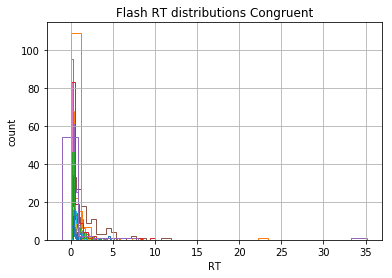

In [64]:


fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Flash RT distributions Congruent')
for i, subj_data in congfdata.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
fig.show()
'''
fig2 = plt.figure()
ax = fig2.add_subplot(111, xlabel='RT', ylabel='count', title='Beep RT distributions Congruent')
for i, subj_data in congbdata.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
    
fig3 = plt.figure()
ax = fig3.add_subplot(111, xlabel='RT', ylabel='count', title='Flash RT distributions Incongruent')
for i, subj_data in incongfdata.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

fig4 = plt.figure()
ax = fig4.add_subplot(111, xlabel='RT', ylabel='count', title='Beep RT distributions Incongruent')
for i, subj_data in incongbdata.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
    
fig5 = plt.figure()
ax = fig5.add_subplot(111, xlabel='RT', ylabel='count', title='Flash RT distributions Unisensory')
for i, subj_data in unifdata.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

fig6 = plt.figure()
ax = fig6.add_subplot(111, xlabel='RT', ylabel='count', title='Beep RT distributions Unisensory')
for i, subj_data in unibdata.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
'''

In [61]:
congfdata['response'].value_counts().plot(kind='bar')
plt.title("Response for congruent flash")

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Flash RT distributions Congruent')
for i, subj_data in congfdata.groupby('response'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

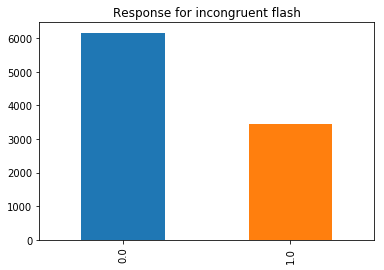

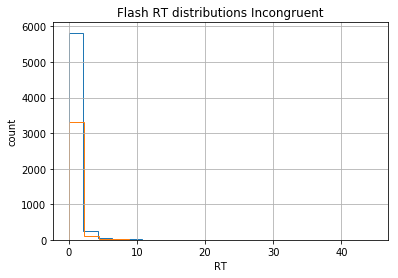

In [26]:
incongfdata['response'].value_counts().plot(kind='bar')
plt.title("Response for incongruent flash")

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Flash RT distributions Incongruent')
for i, subj_data in incongfdata.groupby('response'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

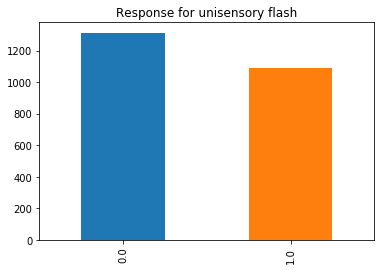

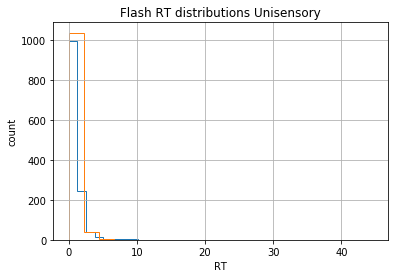

In [27]:
unifdata['response'].value_counts().plot(kind='bar')
plt.title("Response for unisensory flash")

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Flash RT distributions Unisensory')
for i, subj_data in unifdata.groupby('response'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)